In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
path = r'Y:\PYTHON COMMON SERVER\NANDINI\Gaurav\TK15488\CODE\Datasets\EBSPM.csv'

In [3]:
df = pd.read_csv(path,encoding= 'unicode_escape')

In [4]:
df.head()

,Project_ID,Organization,Short_project_description,Year_technical_go_live,Organisation_profile,Business_domain,Development_method,Primary_programming_language,Development_class,Functional_size_FP,...,Package_of_the_shelf,Package_with_customization,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Legacy_application,Technology_driven_project,Rules_and_regulations_driven_project,Business_driven_project,Pilot_or_proof_of_concept
0,411.0,Beltel,T5 Timers - QW from MSP. Small enhancement to ...,2015.0,Telecommunications,Client and Account Management,Plan-driven,NaN,Conversion (<5% new),35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,429.0,Beltel,Easy Script (clean up master MSISDN). Small en...,2015.0,Telecommunications,Billing,Plan-driven,NaN,New Development,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,430.0,Beltel,Campaign Management Tool (Comviva) WP05. Sub-p...,2015.0,Telecommunications,Client and Account Management,Plan-driven,NaN,Major Enhancement (25-75% new),50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,403.0,Beltel,Campaign Management - Change Request 2. Sub-pr...,2015.0,Telecommunications,Data Warehouse & BI,Scrum,NaN,Conversion (<5% new),177.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,434.0,Beltel,Integrate payment by Credit-card Aliases. Smal...,2015.0,Telecommunications,Internet & Mobile,Plan-driven,NaN,Major Enhancement (25-75% new),12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df.tail()

,Project_ID,Organization,Short_project_description,Year_technical_go_live,Organisation_profile,Business_domain,Development_method,Primary_programming_language,Development_class,Functional_size_FP,...,Package_of_the_shelf,Package_with_customization,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Legacy_application,Technology_driven_project,Rules_and_regulations_driven_project,Business_driven_project,Pilot_or_proof_of_concept
488,3.0,Bank B,Maintenance release on one application,2009.0,Banking,Payments,Plan-driven,JAVA,New Development,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,7.0,Bank B,RIBB release 3.8,2009.0,Banking,Savings & Loans,Plan-driven,JAVA,Minor Enhancement (5-25% new),107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,8.0,Bank B,Realisation Anonymous Release 3.0,2009.0,Banking,Client and Account Management,Plan-driven,.NET,Major Enhancement (25-75% new),56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,4.0,Bank B,Maintenance release on one application,2008.0,Banking,Savings & Loans,Plan-driven,Pakket,Major Enhancement (25-75% new),131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(493, 37)

In [7]:
df.isnull().sum()

Project_ID                                1
Organization                              1
Short_project_description                 1
Year_technical_go_live                    1
Organisation_profile                      1
Business_domain                           1
Development_method                        1
Primary_programming_language            143
Development_class                         1
Functional_size_FP                        1
Actual_duration_months                    1
Actual_cost_EUR                           1
Actual_effort_hours                     471
Defects_process                         223
Defects_first_month                     433
Stakeholder_satisfaction_process        472
Stakeholder Satisfaction - Product      472
Perceived_value_overall                 473
Release_based_working                     1
Once_only_project                         1
Multi_application_release                 1
Phased_project                            1
Dependencies_with_other_applicat

In [8]:
df.drop(['Perceived_value_overall','Stakeholder Satisfaction - Product','Stakeholder_satisfaction_process','Defects_first_month','Defects_process','Actual_effort_hours','Primary_programming_language'],axis = 1,inplace =True)

In [9]:
df.isnull().sum()

Project_ID                              1
Organization                            1
Short_project_description               1
Year_technical_go_live                  1
Organisation_profile                    1
Business_domain                         1
Development_method                      1
Development_class                       1
Functional_size_FP                      1
Actual_duration_months                  1
Actual_cost_EUR                         1
Release_based_working                   1
Once_only_project                       1
Multi_application_release               1
Phased_project                          1
Dependencies_with_other_applications    1
Single_application                      1
Migration_project                       1
Problems_with_external_supplier         1
Security_related_project                1
Package_of_the_shelf                    1
Package_with_customization              1
Steady_heartbeat                        1
Fixed_experienced_team            

In [10]:
df.dropna(how = 'any',inplace = True)

In [11]:
df.isnull().any().sum()

0

In [12]:
df.head()

,Project_ID,Organization,Short_project_description,Year_technical_go_live,Organisation_profile,Business_domain,Development_method,Development_class,Functional_size_FP,Actual_duration_months,...,Package_of_the_shelf,Package_with_customization,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Legacy_application,Technology_driven_project,Rules_and_regulations_driven_project,Business_driven_project,Pilot_or_proof_of_concept
0,411.0,Beltel,T5 Timers - QW from MSP. Small enhancement to ...,2015.0,Telecommunications,Client and Account Management,Plan-driven,Conversion (<5% new),35.0,19.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,429.0,Beltel,Easy Script (clean up master MSISDN). Small en...,2015.0,Telecommunications,Billing,Plan-driven,New Development,28.0,10.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,430.0,Beltel,Campaign Management Tool (Comviva) WP05. Sub-p...,2015.0,Telecommunications,Client and Account Management,Plan-driven,Major Enhancement (25-75% new),50.0,11.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,403.0,Beltel,Campaign Management - Change Request 2. Sub-pr...,2015.0,Telecommunications,Data Warehouse & BI,Scrum,Conversion (<5% new),177.0,9.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,434.0,Beltel,Integrate payment by Credit-card Aliases. Smal...,2015.0,Telecommunications,Internet & Mobile,Plan-driven,Major Enhancement (25-75% new),12.0,10.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
df.tail()

,Project_ID,Organization,Short_project_description,Year_technical_go_live,Organisation_profile,Business_domain,Development_method,Development_class,Functional_size_FP,Actual_duration_months,...,Package_of_the_shelf,Package_with_customization,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Legacy_application,Technology_driven_project,Rules_and_regulations_driven_project,Business_driven_project,Pilot_or_proof_of_concept
487,1.0,Bank B,Small maintenance release,2009.0,Banking,Payments,Plan-driven,New Development,47.0,4.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,3.0,Bank B,Maintenance release on one application,2009.0,Banking,Payments,Plan-driven,New Development,128.0,7.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,7.0,Bank B,RIBB release 3.8,2009.0,Banking,Savings & Loans,Plan-driven,Minor Enhancement (5-25% new),107.0,6.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,8.0,Bank B,Realisation Anonymous Release 3.0,2009.0,Banking,Client and Account Management,Plan-driven,Major Enhancement (25-75% new),56.0,3.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,4.0,Bank B,Maintenance release on one application,2008.0,Banking,Savings & Loans,Plan-driven,Major Enhancement (25-75% new),131.0,4.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.shape

(492, 30)

In [15]:
x = pd.read_csv(r'Y:\PYTHON COMMON SERVER\NANDINI\Gaurav\TK15488\CODE\Datasets\Book1.csv')

In [16]:
x.head()

,Pilot_or_proof_of_concept,Business_driven_project,Rules_and_regulations_driven_project,Technology_driven_project,Legacy_application,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Package_with_customization,Security_related_project,Output
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
x.tail()

,Pilot_or_proof_of_concept,Business_driven_project,Rules_and_regulations_driven_project,Technology_driven_project,Legacy_application,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Package_with_customization,Security_related_project,Output
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
x.isnull().sum()

Pilot_or_proof_of_concept               1
Business_driven_project                 1
Rules_and_regulations_driven_project    1
Technology_driven_project               1
Legacy_application                      1
Steady_heartbeat                        1
Fixed_experienced_team                  1
Many_team_changes_unexperienced_team    1
Package_with_customization              1
Security_related_project                1
Output                                  1
dtype: int64

In [19]:
x.dropna(how = 'any',inplace = True)

In [20]:
x.isnull().any().sum()

0

In [21]:
x.shape

(492, 11)

In [22]:
y = x.Output

In [23]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Output, dtype: float64

In [24]:
X = x.iloc[:,:10]

In [25]:
X.head()

,Pilot_or_proof_of_concept,Business_driven_project,Rules_and_regulations_driven_project,Technology_driven_project,Legacy_application,Steady_heartbeat,Fixed_experienced_team,Many_team_changes_unexperienced_team,Package_with_customization,Security_related_project
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Security_related_project', ylabel='count'>

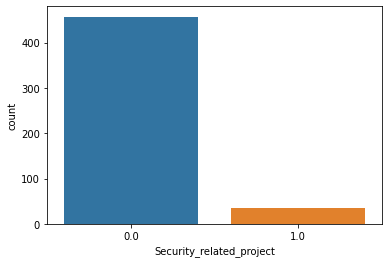

In [26]:
sns.countplot(x = X.Security_related_project)

<AxesSubplot:xlabel='Technology_driven_project', ylabel='count'>

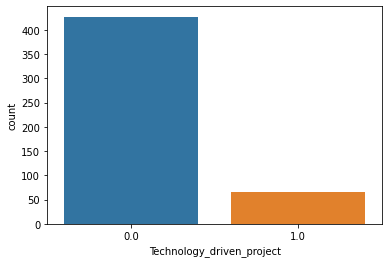

In [27]:
sns.countplot(x = X.Technology_driven_project)

<AxesSubplot:xlabel='Business_driven_project', ylabel='count'>

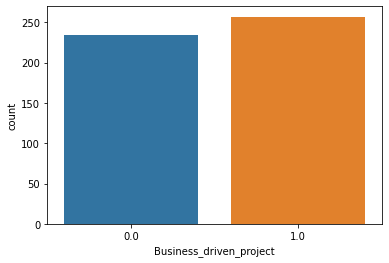

In [28]:
sns.countplot(x = X.Business_driven_project)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [30]:
x_test.shape

(148, 10)

In [31]:
y_train.shape

(344,)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
# confusion_matrix(y_test,model_1_pred)

In [33]:
model_1 = RandomForestClassifier(max_depth = 1,n_estimators = 1)

In [34]:
model_1.fit(x_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=1)

In [35]:
model_1_pred = model_1.predict(x_test)

In [36]:
acc1 = accuracy_score(model_1_pred, y_test)
acc1

0.9662162162162162

In [37]:
confusion_matrix(y_test,model_1_pred)

array([[  5,   3],
       [  2, 138]], dtype=int64)

In [38]:
from xgboost import XGBClassifier

In [39]:
model_2 = xgb.XGBClassifier()
model_2.fit(x_train,y_train)

[10:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Program Files\Python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
model_2_pred = model_2.predict(x_test)


In [41]:
acc2 = accuracy_score(model_2_pred, y_test)
acc2

0.972972972972973

In [42]:
confusion_matrix(y_test,model_2_pred)

array([[  5,   3],
       [  1, 139]], dtype=int64)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model_3 = LogisticRegression(solver='liblinear')

In [45]:
model_3.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [46]:
model_3_pred = model_3.predict(x_test)

In [47]:
acc3 = accuracy_score(model_3_pred, y_test)
acc3

0.972972972972973

In [48]:
confusion_matrix(y_test,model_3_pred)

array([[  5,   3],
       [  1, 139]], dtype=int64)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

model_4 = KNeighborsClassifier(n_neighbors=4, metric='minkowski')

model_4.fit(x_train, y_train)

model_4_pred = model_4.predict(x_test)

from sklearn.metrics import accuracy_score
acc4 = accuracy_score(model_4_pred, y_test)

acc4


0.9797297297297297

In [50]:
print(confusion_matrix(y_test,model_4_pred))

[[  6   2]
 [  1 139]]


In [51]:
accuracy_df = pd.DataFrame({'Model':['Random Forest','xgboost','Logistic Regression', 'KNN'],
                            'Accuracy' : [acc1*100, acc2*100, acc3*100, acc4*100]
                           })

In [52]:
accuracy_df

,Model,Accuracy
0,Random Forest,96.621622
1,xgboost,97.297297
2,Logistic Regression,97.297297
3,KNN,97.972973


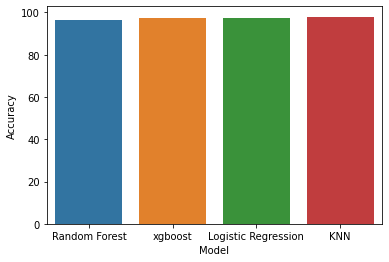

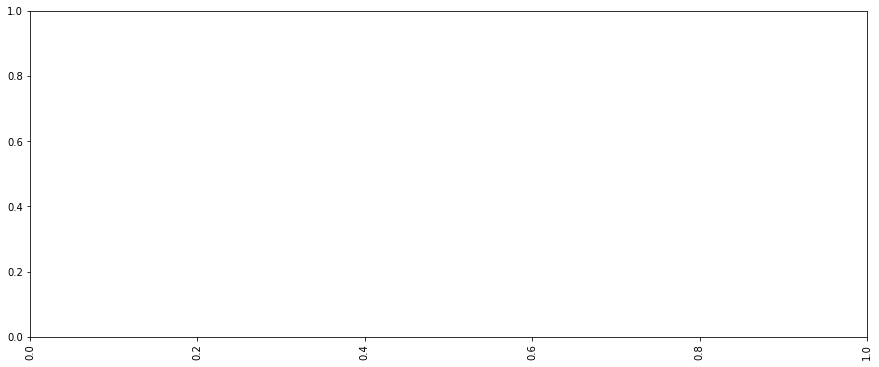

In [53]:
sns.barplot(x =accuracy_df.Model,y = accuracy_df.Accuracy,data = accuracy_df)
plt.figure(figsize=(15,6))
plt.xticks(rotation = 'vertical')
plt.show()

### Extension 

In [54]:
x.Output.value_counts()

1.0    466
0.0     26
Name: Output, dtype: int64

In [55]:
X.isnull().sum()

Pilot_or_proof_of_concept               0
Business_driven_project                 0
Rules_and_regulations_driven_project    0
Technology_driven_project               0
Legacy_application                      0
Steady_heartbeat                        0
Fixed_experienced_team                  0
Many_team_changes_unexperienced_team    0
Package_with_customization              0
Security_related_project                0
dtype: int64

In [56]:
X.shape

(492, 10)

In [57]:
y.shape

(492,)

### Class Imbalance treatment

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE()

In [60]:
x_r,y_r = sm.fit_resample(X,y)

In [61]:
print(x_r.shape,y_r.shape)

(932, 10) (932,)


In [62]:
y_r.value_counts()

0.0    466
1.0    466
Name: Output, dtype: int64

### Training and testing data after treating class imbalance

In [63]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_r,y_r,test_size = 0.3,random_state = 10)

In [64]:
x_train1.shape

(652, 10)

In [65]:
y_test1.shape

(280,)

In [77]:
model4 =KNeighborsClassifier(n_neighbors=4, metric='minkowski')

model4.fit(x_train1, y_train1)

pred4 = model4.predict(x_test1)


In [78]:
model1 =RandomForestClassifier()

model1.fit(x_train1, y_train1)

pred1 = model1.predict(x_test1)

In [79]:
model2 =XGBClassifier()

model2.fit(x_train1, y_train1)

pred2 = model2.predict(x_test1)

[10:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Program Files\Python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [80]:
model3 =LogisticRegression()

model3.fit(x_train1, y_train1)

pred3 = model3.predict(x_test1)

### Comparing all algorithms classification reports

## Random Forest


In [81]:
print(classification_report(y_test1,pred1))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97       134
         1.0       0.94      1.00      0.97       146

    accuracy                           0.97       280
   macro avg       0.97      0.97      0.97       280
weighted avg       0.97      0.97      0.97       280



### XGBoost

In [82]:
print(classification_report(y_test1,pred2))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97       134
         1.0       0.94      1.00      0.97       146

    accuracy                           0.97       280
   macro avg       0.97      0.97      0.97       280
weighted avg       0.97      0.97      0.97       280



### Logistic Regression

In [85]:
print(classification_report(y_test1,pred3))

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83       134
         1.0       0.80      0.97      0.87       146

    accuracy                           0.85       280
   macro avg       0.87      0.85      0.85       280
weighted avg       0.87      0.85      0.85       280



### KNN

In [86]:
print(classification_report(y_test1,pred4))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       134
         1.0       0.94      0.99      0.96       146

    accuracy                           0.96       280
   macro avg       0.96      0.96      0.96       280
weighted avg       0.96      0.96      0.96       280

